# Simulation of animal behavior patterns in context of evolutionary stable strategies.

### Introduction

Evolutionary Stable Strategy (or ESS; also evolutionarily stable strategy): A behavioral strategy (phenotype) if adopted 
by all individuals in a population that cannot be replaced or invaded by a different strategy through natural 
selection.[^1] In game-theoretical terms, an ESS is an equilibrium refinement of the Nash equilibrium, being a Nash 
equilibrium that is also "evolutionarily stable."

### Rules

When two animals contest, the outcome is determined by their behavior type. Only one animal can get the prize, 
wasting time and getting injured are punished. The simplified point system[^2] is as follows:
- Winning: 50 points
- Losing: 0 points
- Injury: -100 points
- Wasting Time: -10 points

For now let's consider only two behaviors, Dove and Hawk. The Dove will spend time contesting the prize non-violently (posing etc.) until its opponent
gives up. If attacked immediately flees leaving the prize behind but avoiding injury. The Hawk will fight for the prize until victorious or injured.
With these behaviors defined we can get the following table of expected average outcomes:

|        |Dove|Hawk|    
|--------|:--:|:--:|
|**Dove**|15  |  0 |
|**Hawk**|50  | -25|
 
Value from each cell represents how much on average will a behavior from it's row get when confronted with another behavior from it's column.
For example: A dove when contesting with another dove will on average earn 15 points each, because they will both waste time 
$(2 \times -10)$ and only one of them will get the prize $(+50)$, this gives average value of $\dfrac{2 \times -10 + 50}{2} = 15$.
 
Simulated population consisting of only doves and hawks will reach an equilibrium with the behavior ratio 5:7 (see Figure 1.1. and 1.2.). This population is stable, because if there were any less doves or hawks their expected reward would be higher than other behavior's and their percentage would increase (see Figure 1.3.). The same ratio can be achieved by solving a system of equations based on the outcome table with d and h variables and a parameter n:
 
$$
\begin{cases}
15 \times d + 0 \times h = n\\
50 \times d - 15 \times h = n\\
\tag{1}
\end{cases}
$$
 
This means that neither hawks or doves will gain advantage over the other and their expected rewards are equal. We also don't assume, that an animal can act in only one way, so acting like a dove with probability $\dfrac{5}{12}$ and acting like a hawk with probability $\dfrac{7}{12}$ could be considered an **Evolutionary Stable Strategy**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import PopulationAnalytical, expected_rewards
from plot_data import plot_population, plot_ratios

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

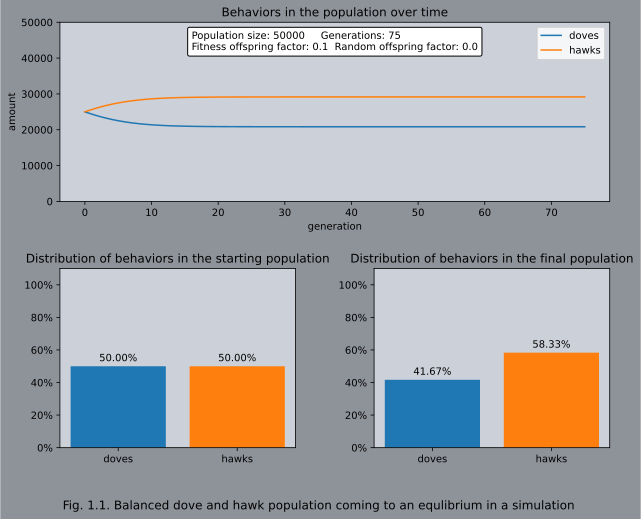

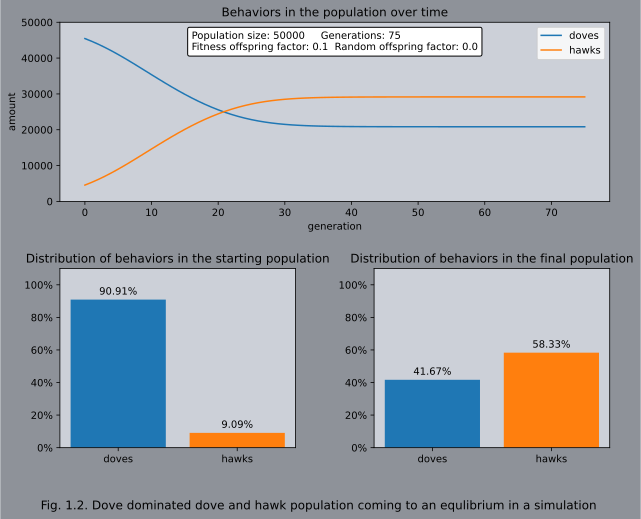

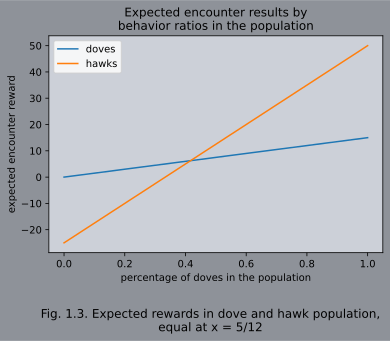

In [2]:
outcome_matrix = np.array([[15, 0],
                           [50, -25]])

balanced_population = PopulationAnalytical(size=50000, generation_count=75,
                                           fitness_offspring_factor=0.1, random_offspring_factor=0.0,
                                           outcome_matrix=outcome_matrix,
                                           behaviors=(0, 1), starting_animal_ratios=(1, 1))

dove_dominant_population = PopulationAnalytical(size=50000, generation_count=75, 
                                                fitness_offspring_factor=0.1, random_offspring_factor=0.0, 
                                                outcome_matrix=outcome_matrix, 
                                                behaviors=(0, 1), starting_animal_ratios=(10, 1))
balanced_population.run_simulation()
dove_dominant_population.run_simulation()
plot_population(balanced_population, "Fig. 1.1. Balanced dove and hawk population coming to an equlibrium in a simulation")
plot_population(dove_dominant_population, "Fig. 1.2. Dove dominated dove and hawk population coming to an equlibrium in a simulation")
plot_ratios(expected_rewards(outcome_matrix), description="Fig. 1.3. Expected rewards in dove and hawk population,\nequal at x = 5/12")

### Rules expansion

Let's introduce another 3 behaviors:
- Retaliator: Will act like a dove until attacked, then it will retaliate.
- Bully: Will act like a hawk until getting attacked, then will act like a dove.
- Prober-Retaliator: Will act like a retaliator, but sometimes probes the contestant by attacking.

We will also use the advanced version of outcome table[^3], for it has been studied more and is more complex:

|                     |Dove |Hawk |Retaliator|Bully|Prober-Retaliator| 
|---------------------|:---:|:---:|:--------:|:---:|:---------------:|
|**Dove**             |29   |19.5 |29        |19.5 |17.2             |
|**Hawk**             |80   |-19.5|-18.1     |74.6 |-18.9            |
|**Retaliator**       |29   |-22.3|29        |57.1 |23.1             |
|**Bully**            |80   |4.9  |11.9      |41.5 |11.2             |
|**Prober-Retaliator**|56.7 |-20.1|26.9      |59.4 |21.9             |

And from now on, instead of table we will use the **outcome matrix** with the ordering like in the table above:

$$
\left(\begin{array}{cc} 
29 & 19.5 & 29 & 19.5 & 17.2\\
80 & -19.5 & -18.1 & 74.6 & -18.9\\  
29 & -22.3 & 29 & 57.1 & 23.1\\  
80 & 4.9 & 11.9 & 41.5 & 11.2\\
56.7 & -20.1 & 26.9 & 59.4 & 21.9\\
\end{array}\right)
\tag{2}
$$

In [3]:
outcome_matrix = np.array([[29, 19.5, 29, 19.5, 17.2],
                           [80, -19.5, -18.1, 74.6, -18.9],
                           [29, -22.3, 29, 57.1, 23.1],
                           [80, 4.9, 11.9, 41.5, 11.2],
                           [56.7, -20.1, 26.9, 59.4, 21.9]])

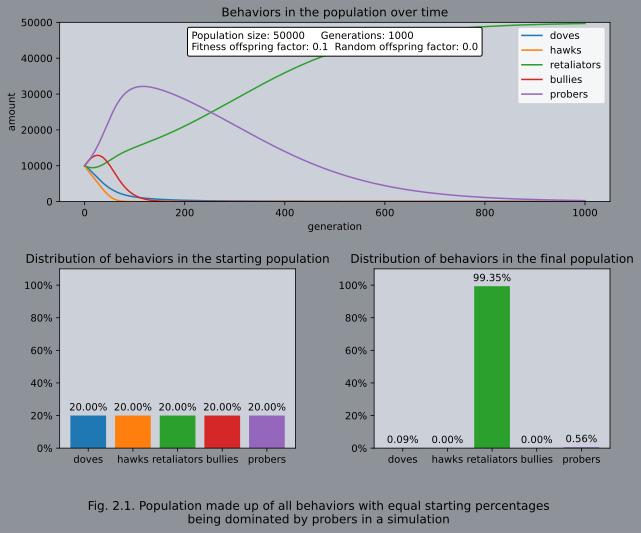

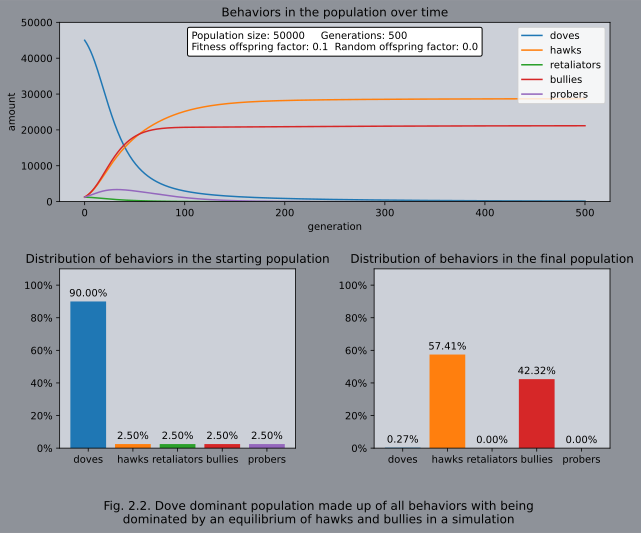

In [4]:
balanced_population = PopulationAnalytical(size=50000, generation_count=1000, 
                                           fitness_offspring_factor=0.1, random_offspring_factor=0.0, 
                                           outcome_matrix=outcome_matrix, 
                                           behaviors=(0, 1, 2, 3, 4), starting_animal_ratios=(1, 1, 1, 1, 1))
dove_dominant_population = PopulationAnalytical(size=50000, generation_count=500, 
                                                fitness_offspring_factor=0.1, random_offspring_factor=0.0, 
                                                outcome_matrix=outcome_matrix, 
                                                behaviors=(0, 1, 2, 3, 4), starting_animal_ratios=(36, 1, 1, 1, 1))
balanced_population.run_simulation()
dove_dominant_population.run_simulation()
plot_population(balanced_population, "Fig. 2.1. Population made up of all behaviors with equal starting percentages\nbeing dominated by probers in a simulation")
plot_population(dove_dominant_population, "Fig. 2.2. Dove dominant population made up of all behaviors with being\ndominated by an equilibrium of hawks and bullies in a simulation")

The population made up of all behaviors with equal starting percentages ends up being dominated by probers-retaliators and other behaviors die out (see Figure 2.1.). However if the starting population is different, for example dominated by doves, the final population can be dominated by an equlibrium of hawks and bullies[^4] (see Figure 2.2.). The outcome of the simulation may seem difficult to predict, but we will try to find an analytical method to predict whether a population composed of given behaviors can be **evolutionarily stable**.

### Analytical approach

Assumptions:
- There are no random mutations, the "random offspring factor" parameter is set to 0.
- The population of any behavior cannot fall below 0.

Let's call the outcome matrix (1) $ M $

We will use the given notation for contructing submatrices: 

$$
M[a_{1}, a_{2}, ..., a_{r}; b_{1}, b_{2}, ..., b_{s}] = 
\left(\begin{array}{cc} 
m_{a_{1}, b_{1}} & m_{a_{1}, b_{2}} & \dots & m_{a_{1}, b_{s}}\\
m_{a_{2}, b_{1}} & m_{a_{2}, b_{2}} & \dots & m_{a_{2}, b_{s}}  \\  
\vdots & \vdots & \ddots & \vdots\\  
m_{a_{r}, b_{1}} & m_{a_{r}, b_{2}} & \dots & m_{a_{r}, b_{s}}  \\
\end{array}\right)
\tag{3}
$$

For example let's construct matrix $M_{0}$:

$$
M_{0} = M[1, 4; 1, 4] = 
\left(\begin{array}{cc} 
29 & 19.5 \\
80 & 41.5 \\
\end{array}\right)
\tag{4}
$$

[^1]: Cowden, C. C. (2012). Game Theory, Evolutionary Stable Strategies and the Evolution of Biological Interactions. Nature Education Knowledge 3(10):6.

[^2]: Dawkins, R. (1989). The Selfish Gene (Anniversary edition). Oxford University Press.

[^3]: Maynard Smith, J., Price, G. (1973). The Logic of Animal Conflict. Nature 246, pp. 15–18.

[^4]: Gale, J., Eaves, L. (1975). Logic of animal conflict. Nature 254, pp. 463.